# An Exploration of Fluctuating Channel Flow

This is a sandbox for exploring the fluctuating channel flow data. Data is loaded using the YT package. You might need to install (using `pip`):
1. Jupyter (and Jupyter Lab)
2. YT
3. numpy
4. matplotlib

... Have fun!

## Import Basics

In [73]:
import sys, os, os.path
import glob

import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

Inline plots and namespace:

In [74]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Utilities

Replace `phi` with `concentration` in plot file's header file (yt doesn't like `phi`...)

In [75]:
### Replace "phi" with "concentration" in plt header file (yt doesn't like phi...)
def substitute_header(plt_file, source="phi", target="con"):
    
    # load header file
    header_file = os.path.join(plt_file, "Header")
    with open(header_file, "r") as f:
        header_orig = f.readlines()
    
    # select variable lables
    n_lables   = int(header_orig[1])
    l_offset   = 2
    
    # make a backup copy(iff the source was found in original)
    if source+"\n" in header_orig:
        header_cpy  = os.path.join(plt_file, "Header.backup")
        with open(header_cpy, "w") as f:
            for line in header_orig:
                f.write(line)
    
    # replace source with target
    for i in range(l_offset, n_lables+l_offset):
        if header_orig[i] == source+"\n":
            header_orig[i] = target+"\n"
    
    # save substituted file in place of original
    with open(header_file, "w") as f:
        for line in header_orig:
            f.write(line)

# Find Data

Currently we're working in the same directory as a the data $=>$ look in `.` for plot files

In [76]:
data_root = "."
data_dir  = "."

In [77]:
data_path = os.path.join(data_root, data_dir)

In [78]:
n_fill   = 5
prefix   = "plt"
file_fmt = prefix + "{:0" + str(n_fill) + "d}"

In [79]:
file_fmt

'plt{:05d}'

In [80]:
data_glob  = os.path.join(data_path, prefix + "*")
data_files = glob.glob(data_glob)
data_files.sort()
print(data_files)

['././plt0000000', '././plt0000160', '././plt0000320', '././plt0000480', '././plt0000640', '././plt0000800', '././plt0000960', '././plt0001120', '././plt0001280', '././plt0001440', '././plt0001600', '././plt0001760', '././plt0001920', '././plt0002080', '././plt0002240', '././plt0002400', '././plt0002560', '././plt0002720', '././plt0002880', '././plt0003040', '././plt0003200', '././plt0003360', '././plt0003520', '././plt0003680', '././plt0003840', '././plt0004000', '././plt0004160', '././plt0004320', '././plt0004480', '././plt0004640', '././plt0004800', '././plt0004960', '././plt0005120', '././plt0005280', '././plt0005440', '././plt0005600', '././plt0005760', '././plt0005920', '././plt0006080', '././plt0006240', '././plt0006400', '././plt0006560', '././plt0006720', '././plt0006880', '././plt0007040', '././plt0007200', '././plt0007360', '././plt0007520', '././plt0007680', '././plt0007840', '././plt0008000', '././plt0008160', '././plt0008320', '././plt0008480', '././plt0008640', '././plt0

## Plot Final State of the Simulation

In [81]:
def plot_index(data_file, str_field, str_coord):
    substitute_header(data_file)
    
    # Loads the data file
    ds = yt.load(data_file)
    
    # Takes a slice perpendicular to the coordinate represented by `str_coord`
    # -> the slice is at the center of the box.
    # -> the data field being sliced has to have the same name as `str_field`
    slc = yt.SlicePlot(ds, str_coord, str_field)
    
    # Set the plotted variable to log scale
    #slc.set_log(str_field, True)
    
    # Show data
    slc.show()
    #slc.save("step_0.png")

Let's find out what fields are contained in the plot file

In [82]:
ds = yt.load(data_files[-1])
ds.field_list

yt : [INFO     ] 2019-07-09 07:58:50,379 Parameters: current_time              = 3.2000000000023285
yt : [INFO     ] 2019-07-09 07:58:50,380 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:58:50,380 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:58:50,382 Parameters: domain_right_edge         = [1. 1. 1.]


[('boxlib', 'averaged_velx'),
 ('boxlib', 'averaged_vely'),
 ('boxlib', 'averaged_velz'),
 ('boxlib', 'divergence'),
 ('boxlib', 'pres'),
 ('boxlib', 'shifted_velx'),
 ('boxlib', 'shifted_vely'),
 ('boxlib', 'shifted_velz'),
 ('boxlib', 'tracer')]

Plot the last plot file's $y$-velocity (slicing normal the $y$-axis).

yt : [INFO     ] 2019-07-09 07:58:50,562 Parameters: current_time              = 3.2000000000023285
yt : [INFO     ] 2019-07-09 07:58:50,563 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:58:50,564 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:58:50,565 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:58:50,691 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 07:58:50,691 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 07:58:50,692 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 07:58:50,693 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 07:58:50,694 Making a fixed resolution buffer of (('boxlib', 'shifted_vely')) 800 by 800
yt : [WARNING  ] 2019-07-09 07:58:50,711 Plot image for field ('boxlib', 'shifted_vely') has both positive and negative values. Min = -0.020234, Max = 0.012201.
yt : [WARNING  ] 2019-07-09 07:58:50,712 Switching to symlog colorbar scaling unle


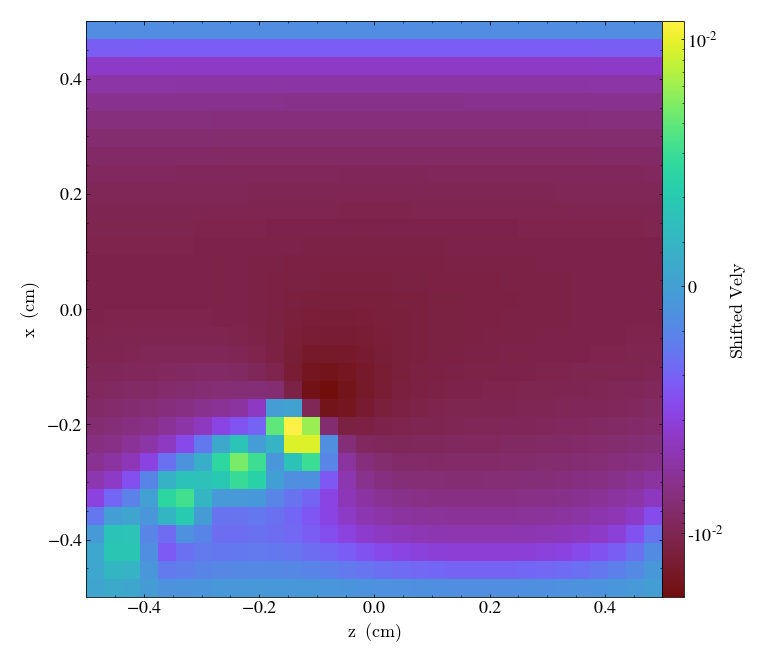

In [83]:
plot_index(data_files[-1], "shifted_vely", "y")

Let's do the same for the presure

yt : [INFO     ] 2019-07-09 07:58:51,269 Parameters: current_time              = 3.2000000000023285
yt : [INFO     ] 2019-07-09 07:58:51,270 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:58:51,273 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:58:51,274 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:58:51,429 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 07:58:51,430 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 07:58:51,430 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 07:58:51,431 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 07:58:51,431 Making a fixed resolution buffer of (('boxlib', 'pres')) 800 by 800
yt : [WARNING  ] 2019-07-09 07:58:51,448 Plot image for field ('boxlib', 'pres') has both positive and negative values. Min = -0.277834, Max = 0.060393.
yt : [WARNING  ] 2019-07-09 07:58:51,448 Switching to symlog colorbar scaling unless linear scalin


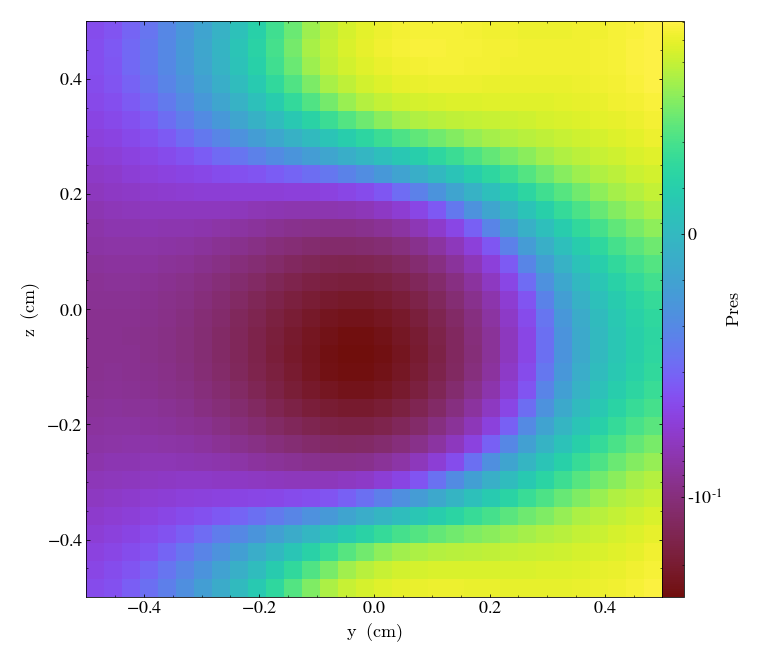

In [84]:
plot_index(data_files[-1], "pres", "x")

# Analyse Data

... with `numpy`

## Velocity fluctuations

In [85]:
ds = yt.load(data_files[-1])

yt : [INFO     ] 2019-07-09 07:58:51,948 Parameters: current_time              = 3.2000000000023285
yt : [INFO     ] 2019-07-09 07:58:51,949 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:58:51,950 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:58:51,951 Parameters: domain_right_edge         = [1. 1. 1.]


Get information about geometry: $\mathrm{d}x$ and index of centre

In [86]:
dx = np.array(
    [
        ( ds.domain_right_edge[i] - ds.domain_left_edge[i] ) / ds.domain_dimensions[i] 
        for i in range(ds.dimensionality) 
    ]
)


centre_slice = np.array([ei for ei in ds.domain_right_edge ])/2
ind_cen      = centre_slice / dx
print(ind_cen)

[16. 16. 16.]


Extract a "cube of data" from the plot file. This might seem a bit convoluted, but remember that YT is built to handle multi-level data. This function covers a given level (in our case, level 0) with a 3D grid (cube) and exports the data into a dict of `numpy` arrays. This way `cube["filed name"]` is a 3D numpy array.

In [87]:
cube = ds.covering_grid(level=0, fields=["shifted_velx", "shifted_vely", "shifted_velz"], 
                        left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
velx = cube["shifted_velx"]
vely = cube["shifted_vely"]
velz = cube["shifted_velz"]

Double-check the data.

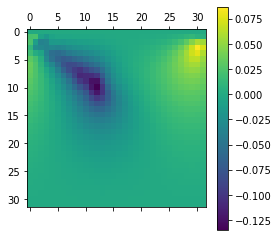

In [88]:
matshow(velx[:, 16, :])
colorbar()

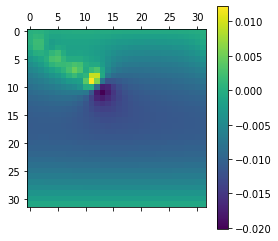

In [89]:
matshow(vely[:, 16, :])
colorbar()

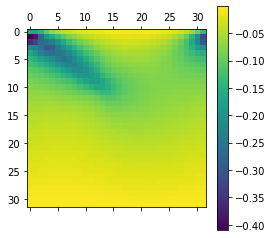

In [90]:
matshow(velz[:, 16, :])
colorbar()

In [91]:
class SoA:
    _pref = "particle_"
    _pos  = "position_"
    _vel  = "vel"
# New here
    _id   = "id"
    _cpu  = "cpu"
    _id_0 = "id_0"
    _cpu_0 = "cpu_0"
    
    def __init__(self, data):
        str_pos = self._pref+self._pos
        self.px = np.array(data[str_pos + "x"])
        self.py = np.array(data[str_pos + "y"])
        self.pz = np.array(data[str_pos + "z"])

        str_vel = self._pref+self._vel
        self.vx = np.array(data[str_vel + "x"])
        self.vy = np.array(data[str_vel + "y"])
        self.vz = np.array(data[str_vel + "z"])

        str_id = self._pref+self._id
        self.id = np.array(data[str_id])
        str_cpu = self._pref+self._cpu
        self.cpu = np.array(data[str_cpu])
        
        str_id_0 = self._pref+self._id_0
        self.id_0 = np.array(data[str_id_0])
        str_cpu_0 = self._pref+self._cpu_0
        self.cpu_0 = np.array(data[str_cpu_0])
 
# new here
    def __str__(self):
        return "{pos:"  + str(self.px) + "," + str(self.py) + "," + str(self.pz) + \
              "; vel:"  + str(self.vx) + "," + str(self.vy) + "," + str(self.vz) + \
              "; id:"   + str(self.id) + ", cpu:" + str(self.cpu) + ", id_0:" + str(self.id_0) + ", cpu_0:" + str(self.cpu_0) + "," + "}"


    def __repr__(self):
        return str(self)


# new here
class Particle:
    def __init__(self, px, py, pz, vx, vy, vz, id, cpu, id_0, cpu_0):
        self.pos = np.array([px, py, pz])
        self.vel = np.array([vx, vy, vz])
        self.id  = np.array(id)
        self.cpu  = np.array(cpu)
        self.id_0  = np.array(id_0)
        self.cpu_0  = np.array(cpu_0)

    def __str__(self):
        return "P(" + str(self.pos) + "," + str(self.vel) + "," + str(self.id) + "," + str(self.cpu) + "," + str(self.id_0) + "," + str(self.cpu_0) + "," + ")"
    

    def __repr__(self):
        return str(self)


class AoS:
    def __init__(self, amrex_data):
        self.particles = list()
        soa = SoA(amrex_data)
# new here        
        data = zip(soa.px, soa.py, soa.pz, soa.vx, soa.vy, soa.vz, soa.id, soa.cpu, soa.id_0, soa.cpu_0)
        for elt in data:
            self.particles.append(Particle(* elt))




In [92]:
ds = AMReXDataset(data_files[-1])

yt : [INFO     ] 2019-07-09 07:58:53,487 Parameters: current_time              = 3.2000000000023285
yt : [INFO     ] 2019-07-09 07:58:53,488 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:58:53,488 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:58:53,490 Parameters: domain_right_edge         = [1. 1. 1.]


In [93]:
ds.particle_fields_by_type

defaultdict(list,
            {'immbdy_markers': ['particle_cpu',
              'particle_cpu_0',
              'particle_cpu_1',
              'particle_forcex',
              'particle_forcey',
              'particle_forcez',
              'particle_id',
              'particle_id_0',
              'particle_id_1',
              'particle_position_x',
              'particle_position_y',
              'particle_position_z',
              'particle_pred_forcex',
              'particle_pred_forcey',
              'particle_pred_forcez',
              'particle_pred_posx',
              'particle_pred_posy',
              'particle_pred_posz',
              'particle_pred_velx',
              'particle_pred_vely',
              'particle_pred_velz',
              'particle_radius',
              'particle_velx',
              'particle_vely',
              'particle_velz']})

In [94]:
ad = ds.all_data()
soa = SoA(ad)
aos = AoS(ad)

In [95]:
aos.particles

[P([0.104387   0.49751532 0.09737218],[-0.02922325  0.00032682 -0.25146508],3.0,1.0,2.0,1.0,),
 P([0.13199028 0.49499708 0.1390007 ],[-0.04389548  0.00064977 -0.24171949],4.0,1.0,3.0,1.0,),
 P([0.16003728 0.49244989 0.18033298],[-0.05862698  0.00096898 -0.23170891],5.0,1.0,4.0,1.0,),
 P([0.18853975 0.48987107 0.22134581],[-0.07341798  0.00128295 -0.22141322],6.0,1.0,5.0,1.0,),
 P([0.21747565 0.48726377 0.26205078],[-0.08826229  0.00159125 -0.21084467],7.0,1.0,6.0,1.0,),
 P([0.24681727 0.48462936 0.30246158],[-0.10315427  0.00189326 -0.20001533],8.0,1.0,7.0,1.0,),
 P([0.2765055  0.48197274 0.34261181],[-0.11808071  0.00218918 -0.1889603 ],9.0,1.0,8.0,1.0,),
 P([0.30649458 0.4792964  0.38254949],[-0.13304027  0.00247942 -0.17771436],10.0,1.0,9.0,1.0,),
 P([0.05       0.5        0.01351013],[ 0.          0.         -0.27044775],1.0,1.0,-1.0,-1.0,),
 P([0.0771913 0.5       0.0554362],[-0.01460543  0.         -0.2609468 ],2.0,1.0,1.0,1.0,)]

In [96]:
nop = 10 #number of particles

In [115]:
aos.particles[0].pos[0:nop]

array([0.104387  , 0.49751532, 0.09737218])

In [98]:
positions_ = dict()
id_        = dict()
cpu_       = dict()
id0_       = dict()
cpu0_      = dict()

for x in range(1,nop+1):
    positions_[x] = list()
    id_[x]        = list()
    cpu_[x]       = list()
    id0_[x]       = list()
    cpu0_[x]      = list()
    

for data_file in data_files:
    ds = AMReXDataset(data_file)
    ad = ds.all_data()
    aos = AoS(ad)
    for y in range(1,nop+1):
        positions_[y].append(aos.particles[y-1].pos)
        id_[y].append(aos.particles[y-1].id)
        cpu_[y].append(aos.particles[y-1].cpu)
        id0_[y].append(aos.particles[y-1].id_0)
        cpu0_[y].append(aos.particles[y-1].cpu_0)
        
   

yt : [INFO     ] 2019-07-09 07:58:54,202 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-09 07:58:54,203 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:58:54,204 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:58:54,206 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:58:54,461 Parameters: current_time              = 0.01599999999999996
yt : [INFO     ] 2019-07-09 07:58:54,461 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:58:54,461 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:58:54,462 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:58:54,716 Parameters: current_time              = 0.03199999999999989
yt : [INFO     ] 2019-07-09 07:58:54,717 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:58:54,717 Parameters: domain_left_edge

yt : [INFO     ] 2019-07-09 07:58:58,690 Parameters: current_time              = 0.35199999999997755
yt : [INFO     ] 2019-07-09 07:58:58,691 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:58:58,691 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:58:58,691 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:58:58,870 Parameters: current_time              = 0.3679999999999758
yt : [INFO     ] 2019-07-09 07:58:58,871 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:58:58,871 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:58:58,871 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:58:59,040 Parameters: current_time              = 0.38399999999997403
yt : [INFO     ] 2019-07-09 07:58:59,040 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:58:59,041 Parameters: d

yt : [INFO     ] 2019-07-09 07:59:02,817 Parameters: current_time              = 0.7039999999999388
yt : [INFO     ] 2019-07-09 07:59:02,818 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:02,818 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:02,820 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:02,995 Parameters: current_time              = 0.719999999999937
yt : [INFO     ] 2019-07-09 07:59:02,996 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:02,996 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:02,997 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:03,152 Parameters: current_time              = 0.7359999999999353
yt : [INFO     ] 2019-07-09 07:59:03,153 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:03,153 Parameters: doma

yt : [INFO     ] 2019-07-09 07:59:06,721 Parameters: current_time              = 1.0559999999999001
yt : [INFO     ] 2019-07-09 07:59:06,722 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:06,722 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:06,722 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:06,953 Parameters: current_time              = 1.0719999999998984
yt : [INFO     ] 2019-07-09 07:59:06,954 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:06,954 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:06,955 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:07,113 Parameters: current_time              = 1.0879999999998966
yt : [INFO     ] 2019-07-09 07:59:07,114 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:07,115 Parameters: dom

yt : [INFO     ] 2019-07-09 07:59:10,746 Parameters: current_time              = 1.4079999999998614
yt : [INFO     ] 2019-07-09 07:59:10,747 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:10,747 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:10,748 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:10,914 Parameters: current_time              = 1.4239999999998596
yt : [INFO     ] 2019-07-09 07:59:10,914 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:10,915 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:10,915 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:11,151 Parameters: current_time              = 1.4399999999998578
yt : [INFO     ] 2019-07-09 07:59:11,151 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:11,152 Parameters: dom

yt : [INFO     ] 2019-07-09 07:59:14,798 Parameters: current_time              = 1.7599999999998226
yt : [INFO     ] 2019-07-09 07:59:14,799 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:14,799 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:14,800 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:14,966 Parameters: current_time              = 1.7759999999998208
yt : [INFO     ] 2019-07-09 07:59:14,967 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:14,969 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:14,969 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:15,128 Parameters: current_time              = 1.791999999999819
yt : [INFO     ] 2019-07-09 07:59:15,128 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:15,129 Parameters: doma

yt : [INFO     ] 2019-07-09 07:59:18,723 Parameters: current_time              = 2.1120000000000325
yt : [INFO     ] 2019-07-09 07:59:18,724 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:18,724 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:18,725 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:18,964 Parameters: current_time              = 2.1280000000000663
yt : [INFO     ] 2019-07-09 07:59:18,964 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:18,965 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:18,965 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:19,130 Parameters: current_time              = 2.1440000000001
yt : [INFO     ] 2019-07-09 07:59:19,131 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:19,131 Parameters: domain

yt : [INFO     ] 2019-07-09 07:59:22,675 Parameters: current_time              = 2.4640000000007753
yt : [INFO     ] 2019-07-09 07:59:22,676 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:22,676 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:22,677 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:22,835 Parameters: current_time              = 2.480000000000809
yt : [INFO     ] 2019-07-09 07:59:22,836 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:22,836 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:22,837 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:23,064 Parameters: current_time              = 2.496000000000843
yt : [INFO     ] 2019-07-09 07:59:23,065 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:23,070 Parameters: domai

yt : [INFO     ] 2019-07-09 07:59:26,750 Parameters: current_time              = 2.816000000001518
yt : [INFO     ] 2019-07-09 07:59:26,750 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:26,751 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:26,751 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:26,935 Parameters: current_time              = 2.832000000001552
yt : [INFO     ] 2019-07-09 07:59:26,935 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:26,936 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:26,938 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:27,108 Parameters: current_time              = 2.8480000000015857
yt : [INFO     ] 2019-07-09 07:59:27,109 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:27,109 Parameters: domai

yt : [INFO     ] 2019-07-09 07:59:30,786 Parameters: current_time              = 3.168000000002261
yt : [INFO     ] 2019-07-09 07:59:30,787 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:30,787 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:30,788 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:30,973 Parameters: current_time              = 3.1840000000022948
yt : [INFO     ] 2019-07-09 07:59:30,973 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:30,974 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:30,974 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:31,163 Parameters: current_time              = 3.2000000000023285
yt : [INFO     ] 2019-07-09 07:59:31,164 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:31,164 Parameters: doma

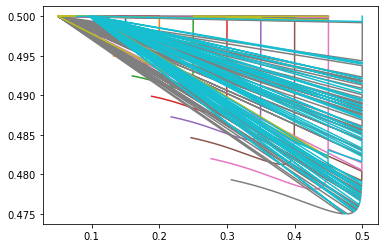

In [99]:
x_ = dict()
y_ = dict()
z_ = dict()
for v in range(1,nop+1):
    x_[v] = np.array([pos[0] for pos in positions_[v]])
    y_[v] = np.array([pos[1] for pos in positions_[v]])
    z_[v] = np.array([pos[2] for pos in positions_[v]])


    
for p in range(1, nop+1):
    plot(x_[p], y_[p])
    

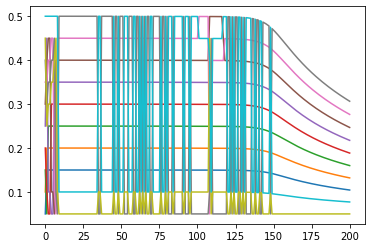

In [100]:
for p in range(1,nop+1):
    plot(x_[p])
   

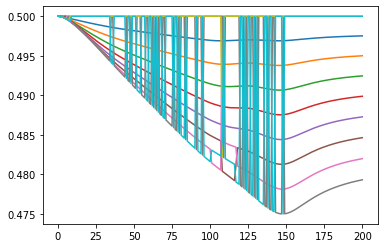

In [101]:
for p in range(1,nop+1):
    plot(y_[p])

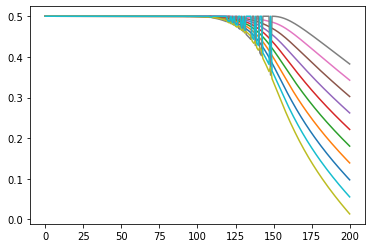

In [102]:
for p in range(1,nop+1):
    plot(z_[p])

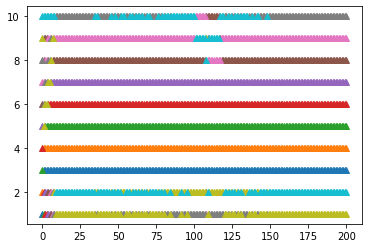

In [103]:
for p in range(1,nop+1):
    plot(id_[p], '^')

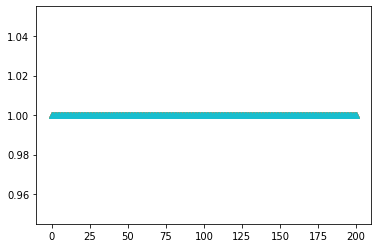

In [104]:
for p in range(1,nop+1):
    plot(cpu_[p], '^')

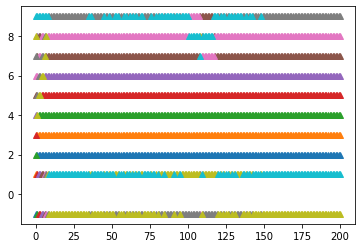

In [105]:
for p in range(1,nop+1):
    plot(id0_[p], '^')

In [106]:
id_sorted_       = dict()
cpu_sorted_      = dict()
position_sorted_ = dict()
marker_id_       = dict()
marker_cpu_      = dict()



for x in range(1,nop+1):
    id_sorted_[x]       = list()
    cpu_sorted_[x]      = list()
    position_sorted_[x] = list()
    
prevmarker_id  = -1
prevmarker_cpu = -1    

for data_file in data_files:
    ds = AMReXDataset(data_file)
    ad = ds.all_data()
    aos = AoS(ad)
    prevmarker_id = -1
    prevmarker_cpu = -1
    for k in range(0, nop):      # need to replace '10' with # of markers
        
            if aos.particles[k].id_0 == prevmarker_id and aos.particles[k].cpu_0 == prevmarker_cpu:
                id_sorted_[1].append(aos.particles[k].id)
                cpu_sorted_[1].append(aos.particles[k].cpu)
                position_sorted_[1].append(aos.particles[k].pos)
                marker_id_[1] = aos.particles[k].id
                marker_cpu_[1] = aos.particles[k].cpu
                
    for i in range(1,nop+1):    
        for k in range(0, nop):
            if aos.particles[k].id_0 == marker_id_[i] and aos.particles[k].cpu_0 == marker_cpu_[i]:
                id_sorted_[i+1].append(aos.particles[k].id)
                cpu_sorted_[i+1].append(aos.particles[k].cpu)
                position_sorted_[i+1].append(aos.particles[k].pos)
                marker_id_[i+1] = aos.particles[k].id
                marker_cpu_[i+1] = aos.particles[k].cpu

yt : [INFO     ] 2019-07-09 07:59:32,610 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-09 07:59:32,614 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:32,614 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:32,617 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:32,789 Parameters: current_time              = 0.01599999999999996
yt : [INFO     ] 2019-07-09 07:59:32,790 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:32,790 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:32,791 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:32,961 Parameters: current_time              = 0.03199999999999989
yt : [INFO     ] 2019-07-09 07:59:32,962 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:32,962 Parameters: domain_left_edge

yt : [INFO     ] 2019-07-09 07:59:36,662 Parameters: current_time              = 0.35199999999997755
yt : [INFO     ] 2019-07-09 07:59:36,665 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:36,666 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:36,667 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:36,903 Parameters: current_time              = 0.3679999999999758
yt : [INFO     ] 2019-07-09 07:59:36,903 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:36,904 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:36,904 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:37,064 Parameters: current_time              = 0.38399999999997403
yt : [INFO     ] 2019-07-09 07:59:37,065 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:37,065 Parameters: d

yt : [INFO     ] 2019-07-09 07:59:40,682 Parameters: current_time              = 0.7039999999999388
yt : [INFO     ] 2019-07-09 07:59:40,683 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:40,683 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:40,684 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:40,841 Parameters: current_time              = 0.719999999999937
yt : [INFO     ] 2019-07-09 07:59:40,841 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:40,842 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:40,843 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:41,079 Parameters: current_time              = 0.7359999999999353
yt : [INFO     ] 2019-07-09 07:59:41,079 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:41,080 Parameters: doma

yt : [INFO     ] 2019-07-09 07:59:44,705 Parameters: current_time              = 1.0559999999999001
yt : [INFO     ] 2019-07-09 07:59:44,705 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:44,706 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:44,706 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:44,864 Parameters: current_time              = 1.0719999999998984
yt : [INFO     ] 2019-07-09 07:59:44,865 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:44,865 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:44,866 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:45,038 Parameters: current_time              = 1.0879999999998966
yt : [INFO     ] 2019-07-09 07:59:45,039 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:45,039 Parameters: dom

yt : [INFO     ] 2019-07-09 07:59:48,838 Parameters: current_time              = 1.4079999999998614
yt : [INFO     ] 2019-07-09 07:59:48,839 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:48,839 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:48,840 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:49,003 Parameters: current_time              = 1.4239999999998596
yt : [INFO     ] 2019-07-09 07:59:49,003 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:49,004 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:49,004 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:49,159 Parameters: current_time              = 1.4399999999998578
yt : [INFO     ] 2019-07-09 07:59:49,161 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:49,161 Parameters: dom

yt : [INFO     ] 2019-07-09 07:59:52,841 Parameters: current_time              = 1.7599999999998226
yt : [INFO     ] 2019-07-09 07:59:52,841 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:52,841 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:52,842 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:52,991 Parameters: current_time              = 1.7759999999998208
yt : [INFO     ] 2019-07-09 07:59:52,991 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:52,992 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:52,992 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:53,263 Parameters: current_time              = 1.791999999999819
yt : [INFO     ] 2019-07-09 07:59:53,263 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:53,264 Parameters: doma

yt : [INFO     ] 2019-07-09 07:59:56,626 Parameters: current_time              = 2.1120000000000325
yt : [INFO     ] 2019-07-09 07:59:56,627 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:56,627 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:56,628 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:56,781 Parameters: current_time              = 2.1280000000000663
yt : [INFO     ] 2019-07-09 07:59:56,781 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:56,782 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 07:59:56,782 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 07:59:56,937 Parameters: current_time              = 2.1440000000001
yt : [INFO     ] 2019-07-09 07:59:56,937 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 07:59:56,938 Parameters: domain

yt : [INFO     ] 2019-07-09 08:00:00,445 Parameters: current_time              = 2.4640000000007753
yt : [INFO     ] 2019-07-09 08:00:00,446 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 08:00:00,447 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 08:00:00,447 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 08:00:00,622 Parameters: current_time              = 2.480000000000809
yt : [INFO     ] 2019-07-09 08:00:00,622 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 08:00:00,623 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 08:00:00,624 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 08:00:00,773 Parameters: current_time              = 2.496000000000843
yt : [INFO     ] 2019-07-09 08:00:00,774 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 08:00:00,774 Parameters: domai

yt : [INFO     ] 2019-07-09 08:00:04,166 Parameters: current_time              = 2.816000000001518
yt : [INFO     ] 2019-07-09 08:00:04,166 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 08:00:04,167 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 08:00:04,167 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 08:00:04,391 Parameters: current_time              = 2.832000000001552
yt : [INFO     ] 2019-07-09 08:00:04,391 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 08:00:04,391 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 08:00:04,392 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 08:00:04,540 Parameters: current_time              = 2.8480000000015857
yt : [INFO     ] 2019-07-09 08:00:04,540 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 08:00:04,541 Parameters: domai

yt : [INFO     ] 2019-07-09 08:00:07,879 Parameters: current_time              = 3.168000000002261
yt : [INFO     ] 2019-07-09 08:00:07,879 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 08:00:07,880 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 08:00:07,880 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 08:00:08,030 Parameters: current_time              = 3.1840000000022948
yt : [INFO     ] 2019-07-09 08:00:08,030 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 08:00:08,031 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 08:00:08,031 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 08:00:08,188 Parameters: current_time              = 3.2000000000023285
yt : [INFO     ] 2019-07-09 08:00:08,188 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-09 08:00:08,189 Parameters: doma

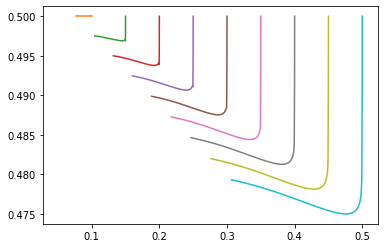

In [107]:
x_                = dict()
y_                = dict()
z_                = dict()


for v in range(1,nop+1):
    x_[v] = np.array([pos[0] for pos in position_sorted_[v]])
    y_[v] = np.array([pos[1] for pos in position_sorted_[v]])
    z_[v] = np.array([pos[2] for pos in position_sorted_[v]])


    
for p in range(1,nop+1):
    plot(x_[p], y_[p])

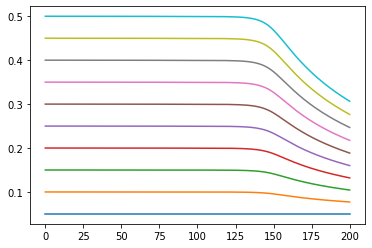

In [108]:
for p in range(1,nop+1):
    plot(x_[p])
   

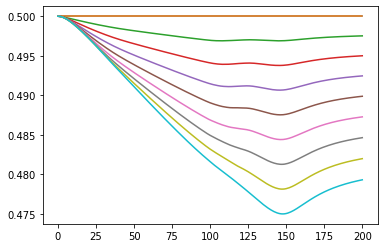

In [109]:
for p in range(1,nop+1):
    plot(y_[p])
   

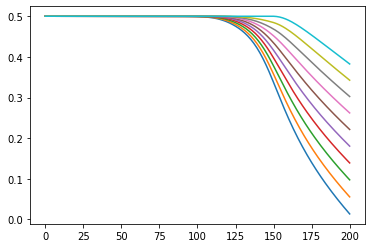

In [110]:
for p in range(1,nop+1):
    plot(z_[p])
   

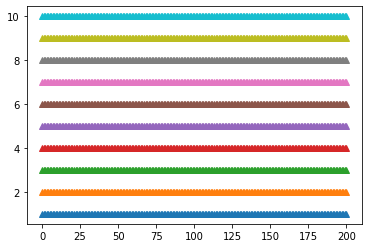

In [111]:
for p in range(1,nop+1):
    plot(id_sorted_[p], '^')

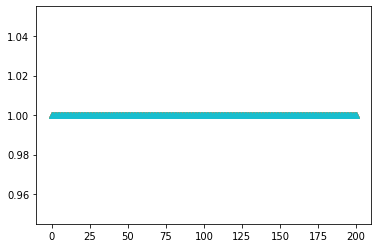

In [112]:
for p in range(1,nop+1):
    plot(cpu_sorted_[p], '^')

## Remove Average `vely`

The $y$-data might seem smooth. But there will be tiny fluctuations. In order to see those, let's compute the average in dimensions 2 and 3.

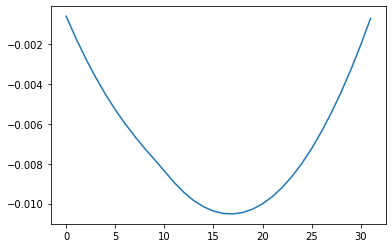

In [113]:
m_vely = mean(mean(vely[:, :, :], axis=1), axis=1)
#              ^^-- returns a 2D array of average velocities
#         ^^------- returns a 1D array of average velocities (the average of the previous average)
plot(m_vely)

Compute fluctuations: `m_vely` is applied to all `dim=1` slices

In [114]:
# slice-wise subtraction of the average velocity... 
# I can't think of a fancy pythonic way of doing this => I'll do it in this cumbersome way:
fluct_vely = np.zeros_like(vely)
for i in range(vely.shape[0]):
    for j in range(vely.shape[1]):
            fluct_vely[:, i, j] = vely[:, i, j] - m_vely[:]

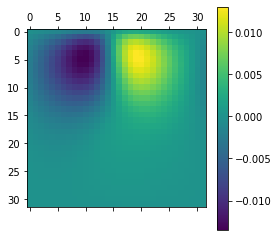

In [42]:
matshow(fluct_vely[:, 8, :])
colorbar()

## Compute $x$, $y$ and $z$ Temperatures (Fluctuations in `velx`, `vely`, `velz`)

In [43]:
t_x = mean(mean(velx[:, :, :]**2, axis=1), axis=1)
#           ^^-- returns a 2D array of average velocities
#      ^^------- returns a 1D array of average velocities (the average of the previous average)
t_x = sqrt(t_x)

In [44]:
t_y = mean(mean(fluct_vely[:, :, :]**2, axis=1), axis=1)
#           ^^-- returns a 2D array of average velocities
#      ^^------- returns a 1D array of average velocities (the average of the previous average)
t_y = sqrt(t_y)

In [45]:
t_z = mean(mean(velz[:, :, :]**2, axis=1), axis=1)
#           ^^-- returns a 2D array of average velocities
#      ^^------- returns a 1D array of average velocities (the average of the previous average)
t_z = sqrt(t_z)

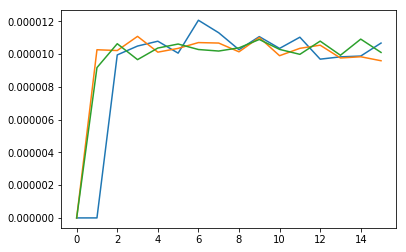

In [25]:
plot(t_x)
plot(t_y)
plot(t_z)

We see that the $x$-fluctuations are supressed due to the wall $\Rightarrow{}$ needs fixing!

# Old Stuff $\Rightarrow{}$ Clean up at some point

In [22]:
def grad(phi):
    dphi_x = np.zeros_like(phi)
    dphi_y = np.zeros_like(phi)
    dphi_z = np.zeros_like(phi)
    
    dphi_x[ :-1, :, :] += phi[1:,   :, :]
    dphi_x[1:,   :, :] -= phi[ :-1, :, :]
    
    dphi_y[:,  :-1, :] += phi[:, 1:,   :]
    dphi_y[:, 1:,   :] -= phi[:,  :-1, :]
    
    dphi_z[:, :,  :-1] += phi[:, :, 1:, ]
    dphi_z[:, :, 1:  ] -= phi[:, :,  :-1]
    
    return dphi_x, dphi_y, dphi_z

In [23]:
grad_x, grad_y, grad_z = grad(cube["con"])

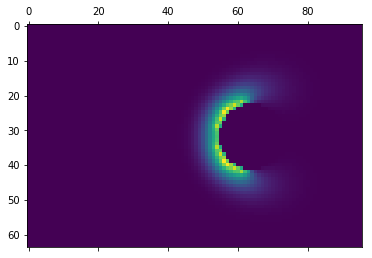

In [250]:
matshow(cube['con'][32, :, :])

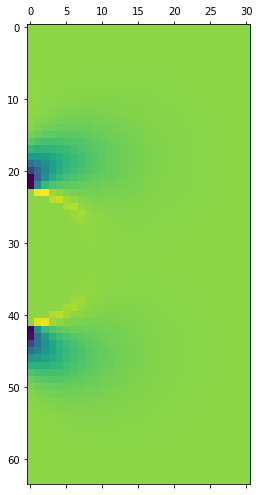

In [108]:
matshow(grad_z[32, :, 65:])

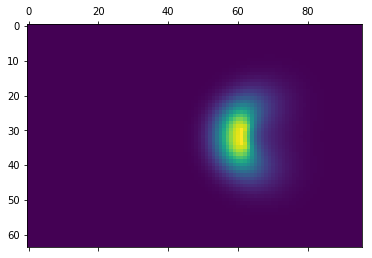

In [252]:
matshow(cube['con'][43, :, :])

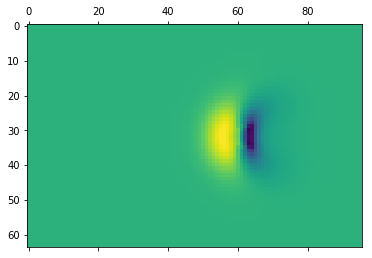

In [251]:
matshow(grad_z[43, :, :])

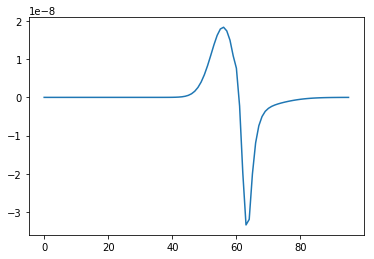

In [246]:
plot(grad_z[43, 30, :])

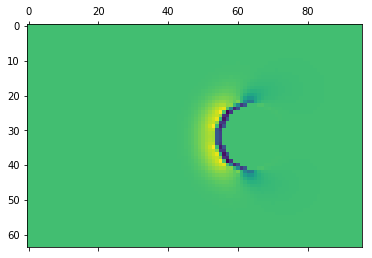

In [187]:
matshow(grad_z[32, :, :])

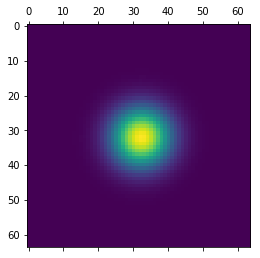

In [188]:
matshow(cube['con'][:, :, 45])

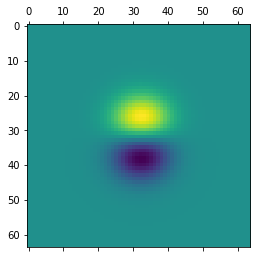

In [193]:
matshow(grad_x[:, :, 45])

In [490]:
def sphere_coord(i_x, i_y, i_z, dr=dx, r_c=centre_colloid):
    x = (i_x + 0.5)*dr[0] - r_c[0]
    y = (i_y + 0.5)*dr[1] - r_c[1]
    z = (i_z + 0.5)*dr[2] - r_c[2]
    
    r     = np.sqrt( x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi   = np.arctan2(y, x)
        
    return r, theta, phi

def r_unit(theta, phi):
    return np.array([
        np.sin(theta)*np.cos(phi),
        np.sin(theta)*np.sin(phi),
        np.cos(theta)
    ])

def theta_unit(theta, phi):
    return np.array([
        np.cos(theta)*np.cos(phi),
        np.cos(theta)*np.sin(phi),
       -np.sin(theta)
    ])

def phi_unit(phi):
    return np.array([
       -np.sin(phi),
        np.cos(phi),
        0
    ])

In [491]:
def grad_sphere(grad_x, grad_y, grad_z):
    grad_r     = np.zeros_like(grad_x)
    grad_phi   = np.zeros_like(grad_y)
    grad_theta = np.zeros_like(grad_z)
    
    r_dat     = np.zeros_like(grad_x)
    phi_dat   = np.zeros_like(grad_x)
    theta_dat = np.zeros_like(grad_x)
    
    for ind, x in ndenumerate(grad_x):
        y = grad_y[ind]
        z = grad_z[ind]
        
        r, theta, phi = sphere_coord(ind[0], ind[1], ind[2])
        r_vec     = r_unit(theta, phi)
        theta_vec = theta_unit(theta, phi)
        phi_vec   = phi_unit(phi)
        
        grad_r[ind]     = np.dot(np.array([x, y, z]), r_vec)
        grad_phi[ind]   = np.dot(np.array([x, y, z]), phi_vec)
        grad_theta[ind] = np.dot(np.array([x, y, z]), theta_vec)
        
        r_dat[ind]     = r
        phi_dat[ind]   = phi
        theta_dat[ind] = theta
        
    return np.array(grad_r), np.array(grad_phi), np.array(grad_theta), r_dat, phi_dat, theta_dat

In [492]:
grad_r, grad_phi, grad_theta, r_dat, phi_dat, theta_dat = grad_sphere(grad_x, grad_y, grad_z)

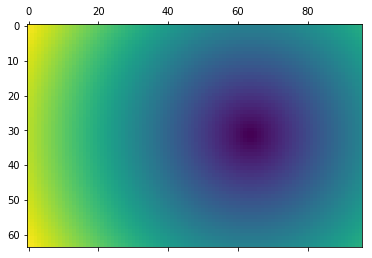

In [493]:
matshow(r_dat[32, :, :])

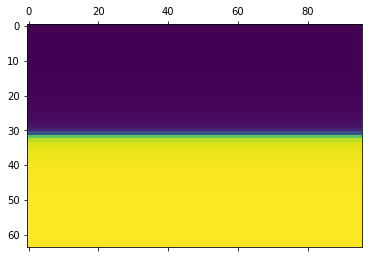

In [494]:
matshow(phi_dat[32, :, :])

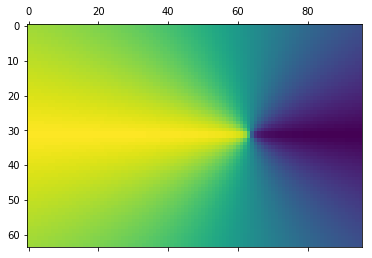

In [495]:
matshow(theta_dat[32, :, :])

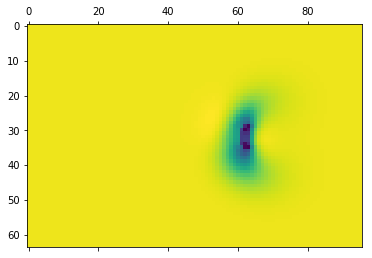

In [496]:
matshow(grad_norm[43, :, :])

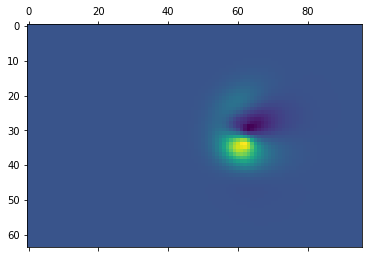

In [497]:
matshow(grad_phi[45, :, :])

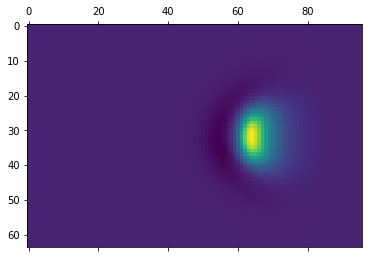

In [498]:
matshow(grad_theta[45, :, :])

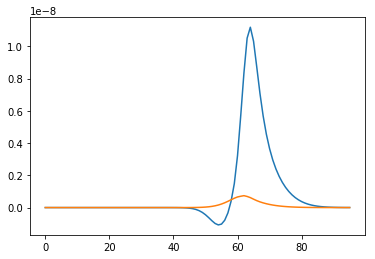

In [507]:
plot(grad_theta[45, 32, :])
plot(grad_phi[45, 40, :])

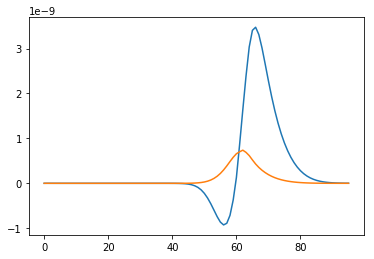

In [500]:
plot(grad_theta[45, 40, :])
plot(grad_phi[45, 40, :])

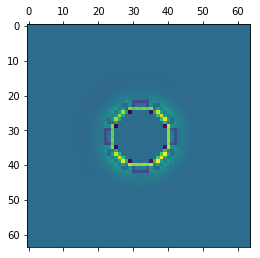

In [501]:
matshow(grad_theta[:, :, 60])

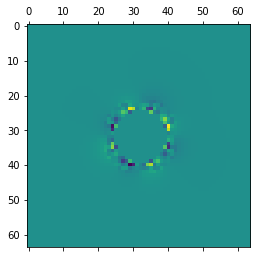

In [502]:
matshow(grad_phi[:, :, 60])

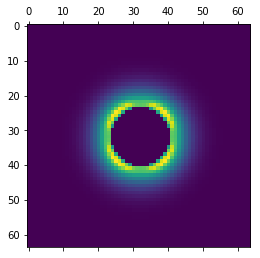

In [503]:
matshow(cube['con'][:, :, 60])

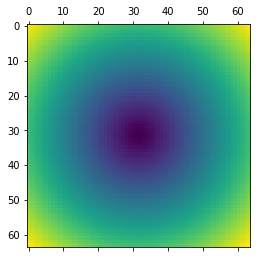

In [504]:
matshow(r_dat[:, :, 60])

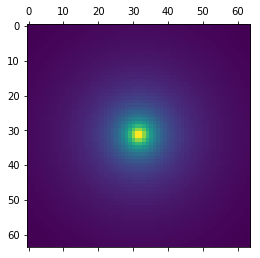

In [505]:
matshow(theta_dat[:, :, 60])

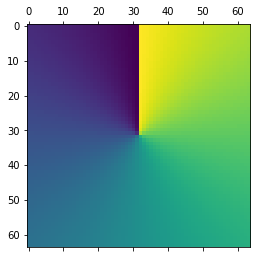

In [506]:
matshow(phi_dat[:, :, 60])

In [566]:
def scan_theta(r, phi, theta_range, grad_x, grad_y, grad_z, r_c=centre_colloid, dr=dx):
    scan = np.zeros_like(theta_range)
    
    for i, theta in enumerate(theta_range):
        x = r_c[0] + r * np.sin(theta)*np.cos(phi)
        y = r_c[1] + r * np.sin(theta)*np.sin(phi)
        z = r_c[2] + r * np.cos(theta)
                
        i_x = int(x / dx[0])
        i_y = int(y / dx[1])
        i_z = int(z / dx[2])
        
        dphi_x = grad_x[i_x, i_y, i_z]
        dphi_y = grad_y[i_x, i_y, i_z]
        dphi_z = grad_z[i_x, i_y, i_z]
        
        e_theta = theta_unit(theta, phi)
        scan[i] = np.dot(np.array([dphi_x, dphi_y, dphi_z]), -e_theta)
    
    return scan

In [575]:
x = np.linspace(0, np.pi, num=100)
y_1 = scan_theta(1.4e-3, 0.0, x, grad_x, grad_y, grad_z)
y_2 = scan_theta(1.4e-3, 0.5, x, grad_x, grad_y, grad_z)
y_3 = scan_theta(1.4e-3, 1, x, grad_x, grad_y, grad_z)

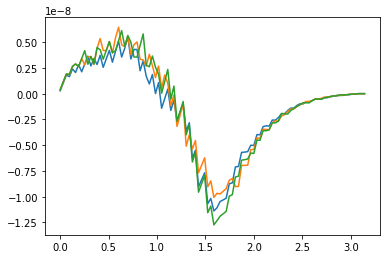

In [576]:
plot(np.pi-x, y_1)
plot(np.pi-x, y_2)
plot(np.pi-x, y_3)

In [536]:
y

array([-5.19956799e-12, -9.90351103e-12,  2.45341939e-11,  8.23369146e-11,
        7.14958822e-11,  1.59297975e-10,  2.61999920e-10,  1.72984853e-10,
        3.72419997e-10,  5.88664859e-10,  3.00852487e-10,  8.73706502e-10,
        6.30019379e-10,  1.50342756e-09,  1.77051944e-09,  2.45637687e-09,
        2.59605648e-09,  2.31715544e-09,  5.07192789e-09,  6.82647158e-09,
        6.27703487e-09,  1.17232692e-08,  2.37962129e-08,  2.23885478e-08,
        5.35642232e-08,  5.53590911e-08,  3.40695350e-08,  2.93257998e-08,
        5.97063264e-09, -1.03368693e-08, -8.55812215e-09,  1.01674588e-08,
       -8.58186650e-09, -6.43166241e-09,  1.32708742e-08, -2.06442949e-09,
       -3.68020493e-09,  8.11566168e-10, -1.95380568e-08,  3.11817098e-09,
       -6.21240799e-09, -1.30965645e-08,  1.00154766e-08, -3.32335727e-09,
       -1.34244697e-08, -1.42038172e-08, -1.19530449e-08, -7.31007113e-09,
       -2.25383236e-09, -2.81931432e-10])

In [509]:
sel = np.abs(r_dat - 1.1e-3) < 1e-3
sum(sel)

39016

In [510]:
theta_sel = theta_dat[sel]
phi_sel   = phi_dat[sel]

grad_norm_sel  = grad_norm[sel]
grad_phi_sel   = grad_phi[sel]
grad_theta_sel = grad_theta[sel]

In [511]:
phi_selector = np.abs(phi_sel - 0.6) < 1e-3
sum(phi_selector)

36

In [512]:
sorted_pts = np.array(sorted(zip(theta_sel[phi_selector], grad_theta_sel[phi_selector])))

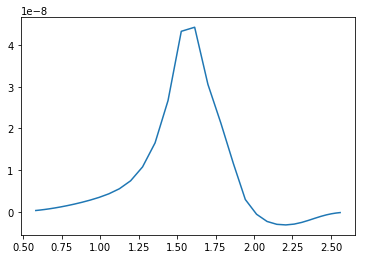

In [513]:
plot(sorted_pts[:,0], sorted_pts[:,1])

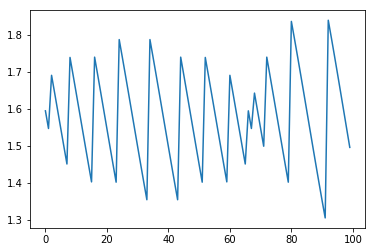

In [514]:
plot(theta_sel[:100])